In [29]:
#import relevant packages
import pandas as pd
import pyarrow as pa
import seaborn as sns

In [2]:
#read feather file from vitals folders
#currently looking into hl7m & tsdb because time resulotion of 60s (1min)
#for future patients: just change pathname (& variable name if u wantfor clarity so u know which patient u are working with)
df = pd.read_feather(r"S:\Fackler_OSS_364376\data\IRB-364376-v1-230215\ptsd-phi\vitals-hl7m\003\1000000003-2016-07-07-0.0166667-1-HL7M.feather", columns=None, use_threads=True, storage_options=None)


In [7]:
#look at the data
df

,dts,AR1-D,AR1-M,AR1-R,AR1-S,CVP2,HR,NBP-D,NBP-M,NBP-R,...,SPO2-R,ST-AVF,ST-AVL,ST-AVR,ST-I,ST-II,ST-III,ST-V1,TP1-1,TP1-2
0,52680.0,48.0,58.0,134.0,70.0,14.0,140.0,NaN,NaN,NaN,...,136.0,-0.4,0.2,0.1,0.2,-0.4,-0.4,-0.5,NaN,NaN
1,52740.0,54.0,64.0,148.0,74.0,15.0,158.0,NaN,NaN,NaN,...,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52800.0,56.0,66.0,148.0,78.0,13.0,160.0,NaN,NaN,NaN,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52860.0,54.0,66.0,150.0,78.0,10.0,156.0,NaN,NaN,NaN,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4,NaN
4,52920.0,56.0,66.0,154.0,76.0,12.0,154.0,NaN,NaN,NaN,...,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,86100.0,46.0,54.0,156.0,62.0,7.0,136.0,NaN,NaN,NaN,...,136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
603,86160.0,48.0,56.0,154.0,64.0,10.0,140.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
604,86220.0,46.0,56.0,146.0,64.0,9.0,140.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8
605,86280.0,46.0,54.0,146.0,64.0,8.0,138.0,NaN,NaN,NaN,...,140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,31.8


In [8]:
#see list of columns (features)
list(df)

['dts',
 'AR1-D',
 'AR1-M',
 'AR1-R',
 'AR1-S',
 'CVP2',
 'HR',
 'NBP-D',
 'NBP-M',
 'NBP-R',
 'NBP-S',
 'PVC',
 'RR',
 'SPO2-%',
 'SPO2-R',
 'ST-AVF',
 'ST-AVL',
 'ST-AVR',
 'ST-I',
 'ST-II',
 'ST-III',
 'ST-V1',
 'TP1-1',
 'TP1-2']

In [10]:
#seperate into two hour time chunks, with remainder until end of df
#INPUT: df of feather file
# OUTPUT: dictionary of 2 hour intervals with remainder until end of data frame
def twoHourChunks(df):
    rows = df.shape[0] #find number of rows in df
    t_intervals = {} # creates empty dictionary to be updated in for loop
    #for loop that completes full 2 hour intervals
    for i in range(int(rows/120)):
        t_intervals['t_2hr_'+str(i)] = df.iloc[(i*120):((i*120)+120),:]
    #for loop that adds whats left over from the df into the dictionary
    for i in range(int(rows/120)*120, rows):
        t_intervals['t_2hr_'+str(int(rows/120))] = df.iloc[(int(rows/120)*120):rows,:]
    return t_intervals

In [15]:
#save output of function (dictionary of time intervals) to a patient specific variable
P003_t_intervals = twoHourChunks(df)
#Example: look at first 2 hour segment for this patient's first feather file
P003_t_intervals['t_2hr_0']

,dts,AR1-D,AR1-M,AR1-R,AR1-S,CVP2,HR,NBP-D,NBP-M,NBP-R,...,SPO2-R,ST-AVF,ST-AVL,ST-AVR,ST-I,ST-II,ST-III,ST-V1,TP1-1,TP1-2
0,52680.0,48.0,58.0,134.0,70.0,14.0,140.0,NaN,NaN,NaN,...,136.0,-0.4,0.2,0.1,0.2,-0.4,-0.4,-0.5,NaN,NaN
1,52740.0,54.0,64.0,148.0,74.0,15.0,158.0,NaN,NaN,NaN,...,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52800.0,56.0,66.0,148.0,78.0,13.0,160.0,NaN,NaN,NaN,...,162.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52860.0,54.0,66.0,150.0,78.0,10.0,156.0,NaN,NaN,NaN,...,154.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4,NaN
4,52920.0,56.0,66.0,154.0,76.0,12.0,154.0,NaN,NaN,NaN,...,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,59220.0,54.0,64.0,152.0,74.0,13.0,152.0,NaN,NaN,NaN,...,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.6,31.2
116,59280.0,56.0,66.0,150.0,74.0,11.0,148.0,NaN,NaN,NaN,...,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.8,31.2
117,59288.0,NaN,NaN,NaN,NaN,NaN,NaN,53.0,64.0,150.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,59340.0,56.0,66.0,150.0,78.0,11.0,146.0,NaN,NaN,NaN,...,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.8,31.2


In [16]:
#function that plots 2 hr HR trace for a given patient with axes & title
#Used seaborn because it interpolates the missing data values which creates a smoother trace
#INPUT: df from 2 hour interval chunks (index the key in the dictionary as a result of the twoHourChunks function)
#OUTPUT: plot of 2hr HR trace for a given patientwith axes & title
def plotHR(t_int_key):
    fig1 = sns.lineplot(data=t_int_key, x = 'dts', y = 'HR')
    fig1.set_title("HR vs Time for Patient 003 First 2 hrs of File")
    fig1.set_xlabel("Time (s)")
    fig1.set_ylabel("HR (bpm)")
    return fig1


<AxesSubplot:title={'center':'HR vs Time for Patient 003 First 2 hrs of File'}, xlabel='Time (s)', ylabel='HR (bpm)'>

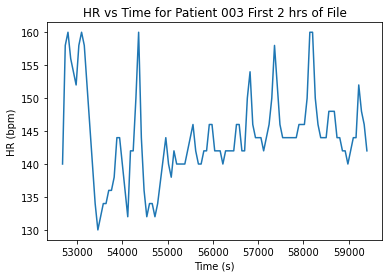

In [17]:
plotHR(P003_t_intervals['t_2hr_0'])

In [30]:
#function that plots 2 hr RR trace for a given patient with axes & title
#Used seaborn because it interpolates the missing data values which creates a smoother trace
#INPUT: df from 2 hour interval chunks (index the key in the dictionary as a result of the twoHourChunks function)
#OUTPUT: plot of 2hr RR trace for a given patientwith axes & title
def plotRR(t_int_key):
    fig1 = sns.lineplot(data=t_int_key, x = 'dts', y = 'RR')
    fig1.set_title("RR vs Time for Patient 003 First 2 hrs of File")
    fig1.set_xlabel("Time (s)")
    fig1.set_ylabel("Respitory Rate (bpm)")
    return fig1

<AxesSubplot:title={'center':'RR vs Time for Patient 003 First 2 hrs of File'}, xlabel='Time (s)', ylabel='Respitory Rate (bpm)'>

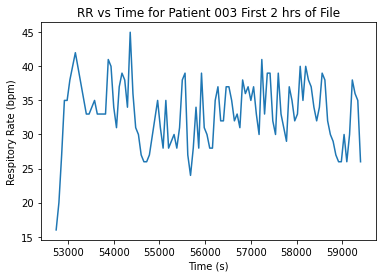

In [31]:
plotRR(P003_t_intervals['t_2hr_0'])

In [33]:
#function that plots 2 hr SPO2-% trace for a given patient with axes & title
#Used seaborn because it interpolates the missing data values which creates a smoother trace
#INPUT: df from 2 hour interval chunks (index the key in the dictionary as a result of the twoHourChunks function)
#OUTPUT: plot of 2hr SPO2-% trace for a given patientwith axes & title
def plotSPO2(t_int_key):
    fig1 = sns.lineplot(data=t_int_key, x = 'dts', y = 'SPO2-%')
    fig1.set_title("SPO2-% vs Time for Patient 003 First 2 hrs of File")
    fig1.set_xlabel("Time (s)")
    fig1.set_ylabel("SPO2-%")
    return fig1

<AxesSubplot:title={'center':'SPO2-% vs Time for Patient 003 First 2 hrs of File'}, xlabel='Time (s)', ylabel='SPO2-%'>

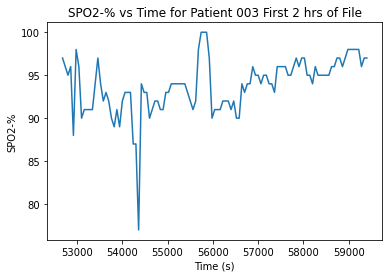

In [34]:
plotSPO2(P003_t_intervals['t_2hr_0'])